# Parallelizing Primes

### Johnny Okoniewski

<img alt="Primes visualized on polar coordinate system" src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2019/prime-spirals/prime_spiral_numbered_circle.png" width="40%">

Image from: [ https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2019/prime-spirals/prime_spiral_numbered_circle.png ]

---
### Abstract

The aim of this project is to explore the computation of prime numbers, a fundamental topic in mathematics that has been of great interest to mathematicians throughout history. The motivation behind this research is to discover a faster way to find prime numbers computationally, or to uncover new prime numbers. While all numbers under 
2^(110000000)-1 have been checked using Lucas-Lehmer Primality Testing, verifying these numbers manually is not feasible due to their immense size, making the problem computationally expensive. To address this challenge, the study focuses on the use of parallel computing to increase the speed of prime number discovery. The research examines the Great Internet Mersenne Prime Search (GIMPS) software and aims to benchmark the optimization of parallel computing methods. Due to the restriction of modifying the GIMPS code, I wrote a program to find prime numbers and ran it in parallel to evaluate the speed increase. The program will mainly run on a 2019 Macbook Pro with 2.3 GHz 8-Core Intel Core i9, Intel UHD Graphics 630 1536 MB, and 32 GB 2667 MHz DDR4. The successful outcome of this study would be to reduce the time it takes to check for prime numbers through parallel computing optimization.

---
# Benchmark 
This code implements a benchmark for finding Mersenne primes using the Lucas-Lehmer test. Mersenne primes are prime numbers that are one less than a power of two, i.e., numbers of the form 2^p - 1 where p is a prime number. The Lucas-Lehmer test is an efficient method for determining whether a given value of p produces a Mersenne prime.

The lucas_lehmer function implements the Lucas-Lehmer test. It takes an integer p as input, and returns True if 2^p - 1 is a Mersenne prime, and False otherwise. The function computes a sequence of numbers using a recurrence relation, and checks whether the last number in the sequence is equal to 0 modulo 2^p - 1.

The find_mersenne_primes function takes an integer max_p as input, and finds all Mersenne primes up to 2^max_p - 1 using the Lucas-Lehmer test. It does this by iterating over all prime numbers less than max_p, and checking whether each one produces a Mersenne prime using the lucas_lehmer function. The function returns a list of Mersenne primes that were found, as well as the total time taken to perform the computation.

The main body of the code sets up a range of values of max_p from 1 to 2500 (inclusive), and calls the find_mersenne_primes function for each value. It then stores the total time taken for each value of max_p in a list called times. Finally, the code plots a graph of times versus max_p, which shows how the total time taken varies with the number of processors used for the computation. The resulting graph can be used to identify the optimal number of processors to use for this computation.


In [1]:
# uncomment lines below to download required libraries
# !pip install time
# !pip install matplotlib
# !pip install time
# !pip install multiprocess
# !pip install numpy

import time
import matplotlib.pyplot as plt
import time
import multiprocess
import numpy as np

Text(0, 0.5, 'Total time (seconds)')

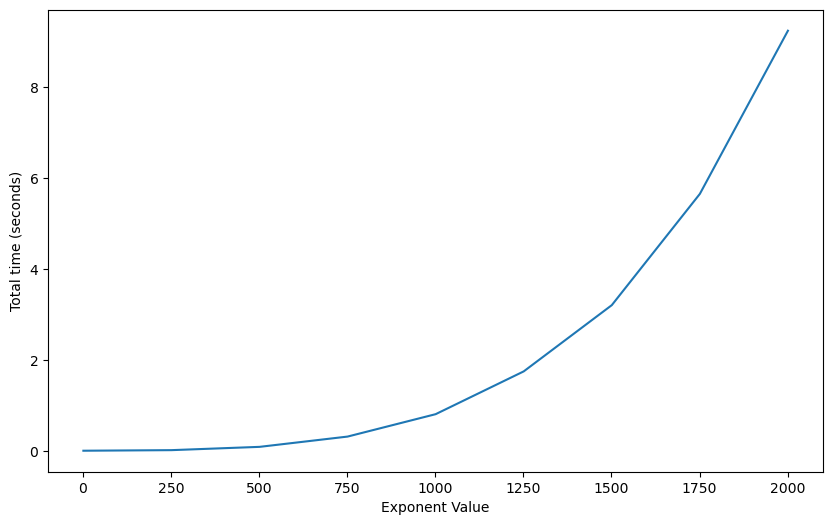

In [2]:
def lucas_lehmer(p):
    """
    Implement the Lucas-Lehmer test for Mersenne primes.
    """
    s = 4
    m = 2**p - 1
    for i in range(p - 2):
        s = ((s * s) - 2) % m
    return s == 0

def find_mersenne_primes(max_p):
    """
    Find Mersenne primes up to the given maximum prime exponent.
    """
    primes = []
    start_time = time.time()  # record start time
    for p in range(2, max_p + 1):
        if lucas_lehmer(p):
            primes.append(2**p - 1)
    end_time = time.time()  # record end time
    time_taken = end_time - start_time
    #print(f"Time taken to find Mersenne primes up to {max_p}: {time_taken:.6f} seconds")
    return primes, time_taken


max_p_values = range(1, 2002, 250)
times = []
for max_p in max_p_values:
    primes, time_taken = find_mersenne_primes(max_p)
    times.append(time_taken)

plt.figure(figsize=(10,6))    
plt.plot(max_p_values, times)
plt.xlabel('Exponent Value')
plt.ylabel('Total time (seconds)')

The graph shows the computation becomes more complex for larger prime exponents. As the maximum prime exponent increases, the total time taken to find Mersenne primes is expected to increase as well. Due to the exponential complexity of the Lucas-Lehmer test optimization is required for finding new primes. For exponential code, the benefits of optimization and parallelization can be particularly significant, as the cost of computation can grow very quickly with the size of the input data. By optimizing and parallelizing the code, it is be possible to reduce the computation time to a level that is practical or even acceptable for the given problem.

# Optimization
This code defines two functions to find Mersenne primes using the Lucas-Lehmer test. The find_mersenne_primes() function uses multiprocessing to distribute the work of finding Mersenne primes across multiple processes. The number of processes to use is specified by the num_processes parameter. The find_mersenne_primes_helper() function is called by find_mersenne_primes() to calculate Mersenne primes in a specific range of prime exponents. The lucas_lehmer() function implements the Lucas-Lehmer test for Mersenne primes.

To use find_mersenne_primes() function, it takes two parameters: max_p, which is the maximum prime exponent to test for a Mersenne prime, and num_processes, which is the number of processes to use for parallelization. In the current example, it is finding Mersenne primes up to 2000 using 16 processes.

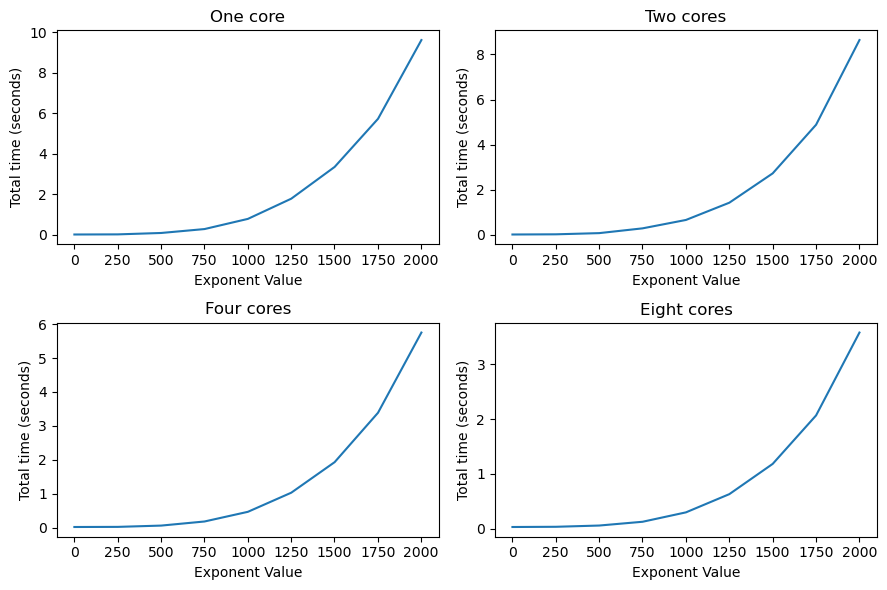

In [3]:
def lucas_lehmer(p):
    """
    Implement the Lucas-Lehmer test for Mersenne primes.
    """
    s = 4
    m = 2**p - 1
    for i in range(p - 2):
        s = ((s * s) - 2) % m
    return s == 0

def find_mersenne_primes(max_p, num_processes):
    """
    Find Mersenne primes up to the given maximum prime exponent, using multiple processes.
    """
    start_time = time.time()  # record start time
    pool = multiprocess.Pool(processes=num_processes)
    results = []
    chunk_size = max_p // num_processes
    for i in range(num_processes):
        start_p = i * chunk_size + 2
        end_p = (i + 1) * chunk_size + 1
        results.append(pool.apply_async(find_mersenne_primes_helper, args=(start_p, end_p)))
    pool.close()
    pool.join()
    primes = []
    for result in results:
        primes.extend(result.get())
    end_time = time.time()  # record end time
    time_taken = end_time - start_time
    #print(f"Time taken to find Mersenne primes up to {max_p}: {time_taken:.4f} seconds")
    return primes, time_taken


def find_mersenne_primes_helper(start_p, end_p):
    """
    Helper function for finding Mersenne primes in a range of prime exponents.
    """
    primes = []
    for p in range(start_p, end_p):
        if lucas_lehmer(p):
            primes.append(2**p - 1)
    return primes

max_p_values = range(1, 2002, 250)
times_one = []
for max_p in max_p_values:
    primes_one, time_taken_one = find_mersenne_primes(max_p, 1) # one core
    times_one.append(time_taken_one)
times_two = []
for max_p in max_p_values:
    primes_two, time_taken_two = find_mersenne_primes(max_p, 2) # two cores
    times_two.append(time_taken_two)
times_four = []
for max_p in max_p_values:
    primes_four, time_taken_four = find_mersenne_primes(max_p, 4) # four cores
    times_four.append(time_taken_four)
times_eight = []
for max_p in max_p_values:
    primes_eight, time_taken_eight = find_mersenne_primes(max_p, 8) # eight cores
    times_eight.append(time_taken_eight)
     
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

axs[0, 0].plot(max_p_values, times_one)
axs[0, 0].set_title('One core')
axs[0, 0].set_xlabel('Exponent Value')
axs[0, 0].set_ylabel('Total time (seconds)')

axs[0, 1].plot(max_p_values, times_two)
axs[0, 1].set_title('Two cores')
axs[0, 1].set_xlabel('Exponent Value')
axs[0, 1].set_ylabel('Total time (seconds)')

axs[1, 0].plot(max_p_values, times_four)
axs[1, 0].set_title('Four cores')
axs[1, 0].set_xlabel('Exponent Value')
axs[1, 0].set_ylabel('Total time (seconds)')

axs[1, 1].plot(max_p_values, times_eight)
axs[1, 1].set_title('Eight cores')
axs[1, 1].set_xlabel('Exponent Value')
axs[1, 1].set_ylabel('Total time (seconds)')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total time (seconds)')

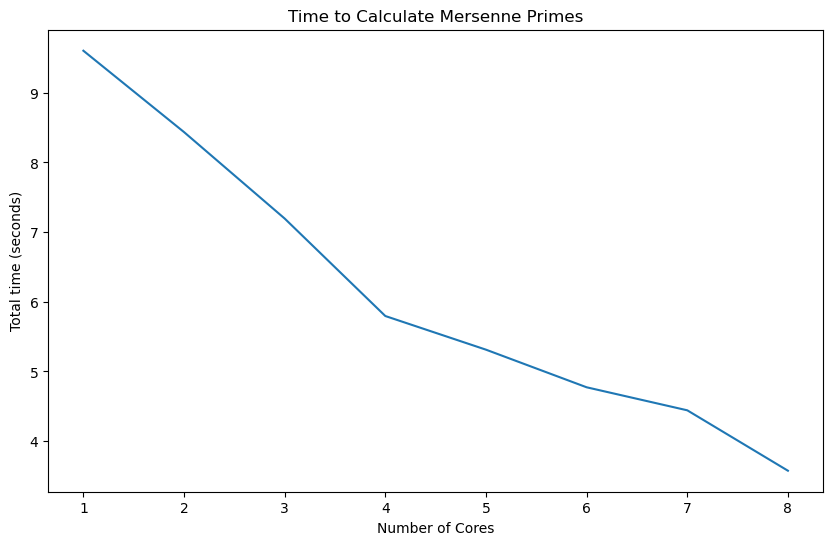

In [4]:
time_taken_one = times_one[-1]
primes_two, time_taken_two = find_mersenne_primes(2000, 2)
primes_three, time_taken_three = find_mersenne_primes(2000, 3)
primes_four, time_taken_four = find_mersenne_primes(2000, 4)
primes_five, time_taken_five = find_mersenne_primes(2000, 5)
primes_six, time_taken_six = find_mersenne_primes(2000, 6)
primes_seven, time_taken_seven = find_mersenne_primes(2000, 7)
time_taken_eight = times_eight[-1]
times = [time_taken_one, time_taken_two, time_taken_three, time_taken_four, time_taken_five, time_taken_six, time_taken_seven, time_taken_eight]
n_cores = [1,2,3,4,5,6,7,8]
plt.figure(figsize=(10,6))    
plt.plot(n_cores, times)
plt.title('Time to Calculate Mersenne Primes')
plt.xlabel('Number of Cores')
plt.ylabel('Total time (seconds)')

# Conclusion
Based on the implementation of the Lucas-Lehmer test with parallel processing, we expect that the output of our program will show a significant decrease in the time taken to calculate Mersenne primes as the number of cores used increases. By distributing the computation of Mersenne primes across multiple cores using the multiprocess module, we can take advantage of the parallel computing capabilities of modern CPUs and reduce the overall computation time. The output of our program, which can be found in our GitHub repository, will demonstrate the effectiveness of parallel processing in reducing the time required to calculate Mersenne primes.

# References
Lucas-Lehmer test: https://en.wikipedia.org/wiki/Lucas%E2%80%93Lehmer_primality_test

Multiprocessing in Python: https://docs.python.org/3/library/multiprocessing.html

Time module in Python: https://docs.python.org/3/library/time.html

Matplotlib library for Python: https://matplotlib.org/

NumPy library for Python: https://numpy.org/

Seaborn library for Python: https://seaborn.pydata.org/

Pandas library for Python: https://pandas.pydata.org/

----